In [35]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [36]:
data = pd.read_csv("wine-clustering.csv")


In [37]:
#Preprocess Data

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [38]:
# Analyze the data
print(data.describe())  # Get summary statistics


          Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000      

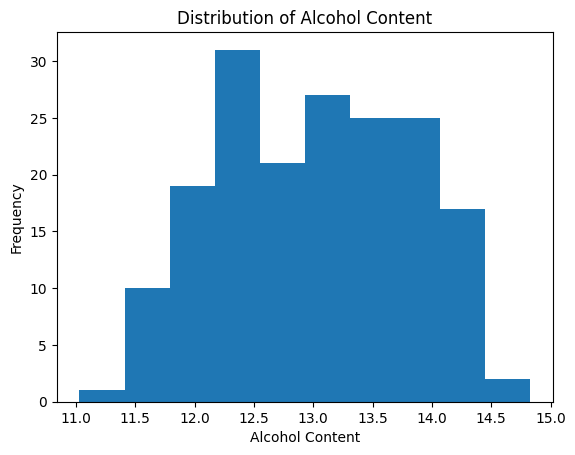

In [39]:
# Explore data distribution

plt.hist(data["Alcohol"])
plt.xlabel("Alcohol Content")
plt.ylabel("Frequency")
plt.title("Distribution of Alcohol Content")
plt.show()


In [40]:
# Calculate correlation matrix to identify highly correlated features
correlation_matrix = data.corr()
print(correlation_matrix)


                       Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  \
Alcohol               1.000000    0.094397  0.211545     -0.310235   0.270798   
Malic_Acid            0.094397    1.000000  0.164045      0.288500  -0.054575   
Ash                   0.211545    0.164045  1.000000      0.443367   0.286587   
Ash_Alcanity         -0.310235    0.288500  0.443367      1.000000  -0.083333   
Magnesium             0.270798   -0.054575  0.286587     -0.083333   1.000000   
Total_Phenols         0.289101   -0.335167  0.128980     -0.321113   0.214401   
Flavanoids            0.236815   -0.411007  0.115077     -0.351370   0.195784   
Nonflavanoid_Phenols -0.155929    0.292977  0.186230      0.361922  -0.256294   
Proanthocyanins       0.136698   -0.220746  0.009652     -0.197327   0.236441   
Color_Intensity       0.546364    0.248985  0.258887      0.018732   0.199950   
Hue                  -0.071747   -0.561296 -0.074667     -0.273955   0.055398   
OD280                 0.0723

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

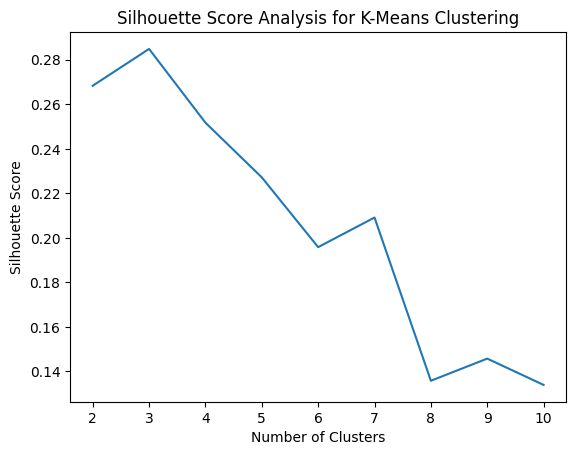

In [41]:
# Determine optimal number of clusters (K-Means)
silhouette_scores = []
for n_clusters in range(2, 11):  # i take (2, 11): range number of clusters
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)  # i take random state 42 for reproducibility
    cluster_labels = kmeans.fit_predict(scaled_data)
    silhouette_scores.append(silhouette_score(scaled_data, cluster_labels))

plt.plot(range(2, 11), silhouette_scores)
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score Analysis for K-Means Clustering")
plt.show()



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


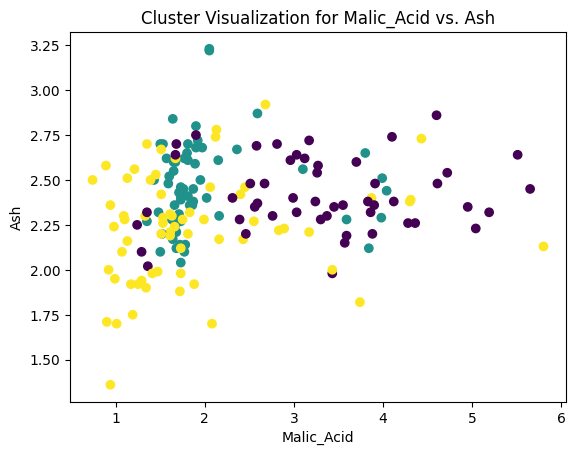

In [42]:
# n_clusters with the highest silhouette score
best_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

# Train and visualize the model
kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
kmeans.fit(scaled_data)
cluster_labels = kmeans.labels_
data["cluster"] = cluster_labels

# Select the two features with the highest correlation
features_to_plot = correlation_matrix.abs().unstack().sort_values(ascending=False)[1:3].index.tolist()

#visualize Malic_Acid vs. Ash
features_to_plot = ['Malic_Acid', 'Ash']

plt.scatter(data[features_to_plot[0]], data[features_to_plot[1]], c=data["cluster"], cmap="viridis")
plt.xlabel(features_to_plot[0])
plt.ylabel(features_to_plot[1])
plt.title(f"Cluster Visualization for {features_to_plot[0]} vs. {features_to_plot[1]}")
plt.show()